<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#In-a-loop-on-real-data-now" data-toc-modified-id="In-a-loop-on-real-data-now-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>In a loop on real data now</a></span><ul class="toc-item"><li><span><a href="#Correlation-of-Columns" data-toc-modified-id="Correlation-of-Columns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Correlation of Columns</a></span></li><li><span><a href="#Data-Prep-for-Vanilla-Regression" data-toc-modified-id="Data-Prep-for-Vanilla-Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Prep for Vanilla Regression</a></span></li><li><span><a href="#Flexible-Regression-model" data-toc-modified-id="Flexible-Regression-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Flexible Regression model</a></span></li><li><span><a href="#Accuracy-with-old-data" data-toc-modified-id="Accuracy-with-old-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Accuracy with old data</a></span></li></ul></li><li><span><a href="#Together-with-new-Files" data-toc-modified-id="Together-with-new-Files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Together with new Files</a></span><ul class="toc-item"><li><span><a href="#Correlation-of-Columns-with-new-data" data-toc-modified-id="Correlation-of-Columns-with-new-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Correlation of Columns with new data</a></span></li><li><span><a href="#Data-Prep-for-Vanilla-Regression" data-toc-modified-id="Data-Prep-for-Vanilla-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Prep for Vanilla Regression</a></span></li><li><span><a href="#Flexible-Regression-model" data-toc-modified-id="Flexible-Regression-model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Flexible Regression model</a></span></li><li><span><a href="#Accuracy-with-new-data" data-toc-modified-id="Accuracy-with-new-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Accuracy with new data</a></span></li></ul></li><li><span><a href="#Only-New-Data" data-toc-modified-id="Only-New-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Only New Data</a></span><ul class="toc-item"><li><span><a href="#Correlation-of-Columns" data-toc-modified-id="Correlation-of-Columns-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Correlation of Columns</a></span></li><li><span><a href="#Data-Prep-for-Vanilla-Regression" data-toc-modified-id="Data-Prep-for-Vanilla-Regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Data Prep for Vanilla Regression</a></span></li><li><span><a href="#Flexible-Regression-model" data-toc-modified-id="Flexible-Regression-model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Flexible Regression model</a></span></li><li><span><a href="#Accuracy-with-only-new-data" data-toc-modified-id="Accuracy-with-only-new-data-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Accuracy with only new data</a></span></li></ul></li><li><span><a href="#Scikitlearn-Regression-Metrics" data-toc-modified-id="Scikitlearn-Regression-Metrics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scikitlearn Regression Metrics</a></span></li><li><span><a href="#End-bookmark" data-toc-modified-id="End-bookmark-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>End bookmark</a></span></li></ul></div>

# Imports

In [11]:
import pandas as pd
import os
import glob
import numpy as np
import json
from IPython.display import clear_output

from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn.metrics import mean_squared_error

# In a loop on real data now

In [12]:
import json 
import pandas as pd 
import glob
import datetime
from pandas import json_normalize #package for flattening json in pandas df
from tqdm import trange, tqdm

In [3]:
trace_files = glob.glob('./tracelyzer//*.json')
trace_files

['./tracelyzer\\1000-point-metrics_run_0_1608585427341.json',
 './tracelyzer\\1000-point-metrics_run_1_1608585434956.json',
 './tracelyzer\\1000-point-metrics_run_2_1608585438367.json',
 './tracelyzer\\1000-point-metrics_run_3_1608585444734.json',
 './tracelyzer\\1000-point-metrics_run_4_1608585451100.json',
 './tracelyzer\\1000-point-metrics_run_5_1608585454481.json',
 './tracelyzer\\1000-point-metrics_run_6_1608585457931.json',
 './tracelyzer\\1000-point-metrics_run_7_1608585461227.json',
 './tracelyzer\\1000-point-metrics_run_8_1608585464663.json',
 './tracelyzer\\1000-point-metrics_run_9_1608585468264.json',
 './tracelyzer\\1000-shape-metrics_run_0_1608610558467.json',
 './tracelyzer\\1000-shape-metrics_run_1_1608610561900.json',
 './tracelyzer\\1000-shape-metrics_run_2_1608610565933.json',
 './tracelyzer\\1000-shape-metrics_run_3_1608610569656.json',
 './tracelyzer\\1000-shape-metrics_run_4_1608610573438.json',
 './tracelyzer\\1000-shape-metrics_run_5_1608610577315.json',
 './trac

In [4]:
shape_data = [int(trace_file.split('\\')[1].split('-')[0]) for trace_file in trace_files]
shape_data
from collections import Counter
sCounter = Counter(shape_data)
shapesdf = pd.DataFrame().from_dict({'value':dict(sCounter)})
shapesdf.shape, shapesdf

((150, 1),
        value
 1000      20
 1180      16
 1347      38
 1526       1
 2000      18
 ...      ...
 45000     18
 46000     12
 47000     12
 48000     16
 49000     15
 
 [150 rows x 1 columns])

In [5]:
mydf = pd.DataFrame()
#load json object
for trace_file in trace_files:
    with open(trace_file) as f:
        try:
            d = json.load(f)
        except:
            print(f'file: {file} cannot be read')
        
        #lets put the data into a pandas df
        #clicking on raw_nyc_phil.json under "Input Files"
        #tells us parent node is 'programs'
        nycphil = json_normalize(d['profiling']['categories'])
#         print(nycphil.head(3))
        
        nycphil1 = json_normalize(d['profiling']['events'])
#         print(nycphil1.head(3))
        
        nycphil2 = json_normalize(d['rendering'])
#         print(nycphil2.head(3))
        
        nycphil3 = json_normalize(data=d['metrics'], meta=['name','value'])#json_normalize(d['metrics'])
        nycphil3 = nycphil3.set_index('name')
        # nycphil3 = nycphil3.rename(columns={"value": "0"})
        nycphil3 = nycphil3.T
#         print(nycphil3.head(3))
        
        nycphil4 = d['performanceTiming']
        nycphil4 = pd.DataFrame({'value':json.loads(nycphil4)})
        nycphil4 = nycphil4.T
#         nycphil4.head(3)
#         perfkeys = [key for key in d.keys() if key not in ['profiling','rendering','metrics']]
#         nycphil4 = {
#                 key:d[key] for key in perfkeys
#                    }
#         nycphil4 = pd.DataFrame(nycphil4,index={'value'})
#         nycphil4.head()

#         print(nycphil.shape, nycphil1.shape, nycphil2.shape, nycphil3.shape)
        
        for col in nycphil1:
            nycphil[col] = nycphil1[col]
            
        for col in nycphil2:
            nycphil[col] = nycphil2[col]
        
        for col in nycphil3:
        #     print(nycphil3[col])
            nycphil[col] = nycphil3.iloc[0][col]
        
        for col in nycphil4:
        #     print(nycphil4[col])
            nycphil[col] = nycphil4.iloc[0][col]
        
        
#         print(nycphil.shape)
    mydf = nycphil if not mydf.count().any() else mydf.append(nycphil)

In [6]:
mydf

,scripting,rendering,loading,painting,JS Frame,Layout,Parse HTML,Recalculate Style,Run Microtasks,Paint,...,responseStart,secureConnectionStart,unloadEventEnd,unloadEventStart,Animation Frame Fired,Image Decode,XHR Load,Major GC,fps,Fire Idle Callback
0,113.008000,93.058,24.101000,5.983000,95.256999,81.076,22.023000,9.582,9.031,5.326,...,1608585424648,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
0,163.756999,83.199,24.709000,10.721000,133.487000,62.112,22.531000,14.405,14.574,5.044,...,1608585428697,0,0,0,2.380999,0.058,NaN,NaN,NaN,NaN
0,119.120000,61.772,18.341000,7.526999,101.358999,41.275,16.671001,14.122,8.241,3.652,...,1608585436322,0,0,0,2.966000,0.066,NaN,NaN,NaN,NaN
0,106.325000,50.659,16.904000,7.085000,89.634000,36.099,15.776000,9.974,6.505,4.070,...,1608585441768,0,0,0,2.802000,0.090,NaN,NaN,NaN,NaN
0,127.197000,58.582,19.088000,8.262000,108.212000,38.772,17.612000,13.989,7.831,4.247,...,1608585448156,0,0,0,2.725000,0.119,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,97.850000,47.023,17.922000,5.325000,81.806000,33.479,16.399000,9.005,7.495,3.090,...,1608610102082,0,0,0,2.243000,0.036,NaN,NaN,NaN,NaN
0,110.877999,56.676,19.012000,9.951999,92.348999,32.681,17.127000,15.393,6.261,4.127,...,1608610105721,0,0,0,4.444000,NaN,NaN,NaN,NaN,NaN
0,105.055001,57.921,19.653000,9.035000,88.583001,37.457,17.563000,13.640,6.340,3.803,...,1608610110036,0,0,0,3.939000,0.037,NaN,NaN,NaN,NaN
0,109.488000,52.567,21.184000,7.227000,93.965000,34.075,19.879000,10.411,6.455,3.382,...,1608610113578,0,0,0,3.068000,0.105,NaN,NaN,NaN,NaN


In [7]:
# is_NaN = mydf.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# nans = mydf.loc[row_has_NaN == True]
# nans.to_csv('nans.csv')
mydf = mydf.fillna('0')

In [8]:
mydf.to_csv('metric-dataframe-'+ datetime.datetime.now().strftime("%d%b%Y-%I%M%p") + '.csv')

In [9]:
import datetime
datetime.datetime.now().strftime("%d%b%Y-%I%M%p")

'26Jan2021-0231PM'

## Correlation of Columns

In [10]:
done = u'\u2713'
todo = u'\u2610'
done_list = [
    'Nodes','JSHeapUsedSize','JSHeapTotalSize'
     ,'scripting','rendering','painting','loading',
     'TaskDuration','ThreadTime','ProcessTime'
    ,'RecalcStyleCount'
    ,'LayoutDuration'
    ,'RecalcStyleDuration'
    ,'DevToolsCommandDuration'
    ,'ScriptDuration'
    ,'V8CompileDuration'
    ,'TaskOtherDuration'
            ]
for func in done_list:
    funcname = func.split("(")[0]
    print(done + funcname)
for func in [col for col in list(mydf.columns) if col not in done_list]:
    funcname = func.split("(")[0]
    print(todo + funcname)

✓Nodes
✓JSHeapUsedSize
✓JSHeapTotalSize
✓scripting
✓rendering
✓painting
✓loading
✓TaskDuration
✓ThreadTime
✓ProcessTime
✓RecalcStyleCount
✓LayoutDuration
✓RecalcStyleDuration
✓DevToolsCommandDuration
✓ScriptDuration
✓V8CompileDuration
✓TaskOtherDuration
☐JS Frame
☐Layout
☐Parse HTML
☐Recalculate Style
☐Run Microtasks
☐Paint
☐Compile Script
☐Minor GC
☐Update Layer Tree
☐Parse Stylesheet
☐Composite Layers
☐Evaluate Script
☐Hit Test
☐XHR Ready State Change
☐firstPaint
☐forcedReflowEvents
☐fps.mean
☐fps.variance
☐fps.sd
☐fps.lo
☐fps.hi
☐Timestamp
☐AudioHandlers
☐Documents
☐Frames
☐JSEventListeners
☐LayoutObjects
☐MediaKeySessions
☐MediaKeys
☐Resources
☐ContextLifecycleStateObservers
☐V8PerContextDatas
☐WorkerGlobalScopes
☐UACSSResources
☐RTCPeerConnections
☐ResourceFetchers
☐AdSubframes
☐DetachedScriptStates
☐ArrayBufferContents
☐LayoutCount
☐FirstMeaningfulPaint
☐DomContentLoaded
☐NavigationStart
☐connectEnd
☐connectStart
☐domComplete
☐domContentLoadedEventEnd
☐domContentLoadedEventStart


In [11]:
corrdf = mydf[done_list] #'Major GC','Minor GC'
corrdf

,Nodes,JSHeapUsedSize,JSHeapTotalSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration
0,330.0,5412548.0,7348224.0,113.008000,93.058,5.983000,24.101000,1.341042,0.375995,0.890625,6.0,0.080913,0.006582,0.007277,0.102257,0.004325,1.139688
0,330.0,5450604.0,7348224.0,163.756999,83.199,10.721000,24.709000,0.409688,0.454113,3.812500,14.0,0.062208,0.012585,0.011935,0.145061,0.007035,0.170864
0,330.0,5477748.0,7348224.0,119.120000,61.772,7.526999,18.341000,0.302941,0.340813,0.687500,23.0,0.041370,0.012484,0.010600,0.109060,0.003591,0.125836
0,330.0,5442708.0,7348224.0,106.325000,50.659,7.085000,16.904000,0.269681,0.343763,1.062500,19.0,0.036265,0.008655,0.008454,0.097604,0.003678,0.115025
0,330.0,5443360.0,7348224.0,127.197000,58.582,8.262000,19.088000,0.305357,0.351943,1.078125,15.0,0.039066,0.009674,0.011396,0.113848,0.004605,0.126768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,338.0,5560548.0,7348224.0,97.850000,47.023,5.325000,17.922000,0.256901,0.296244,0.781250,15.0,0.033536,0.007777,0.014832,0.088454,0.003268,0.109034
0,338.0,5876352.0,7348224.0,110.877999,56.676,9.951999,19.012000,0.288660,0.338296,0.921875,40.0,0.032822,0.013600,0.013332,0.097353,0.003128,0.128425
0,338.0,5571636.0,7348224.0,105.055001,57.921,9.035000,19.653000,0.283464,0.323344,0.859375,32.0,0.037535,0.012329,0.014577,0.095612,0.003176,0.120235
0,338.0,5573408.0,7348224.0,109.488000,52.567,7.227000,21.184000,0.283823,0.319941,0.859375,23.0,0.034223,0.009331,0.018238,0.100385,0.003084,0.118562


In [12]:
corrdf['JSHeapRatio'] = corrdf['JSHeapUsedSize']/corrdf['JSHeapTotalSize']
corrdf = corrdf.drop(columns='JSHeapTotalSize')
corrdf

C:\Users\Sanke\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
0,330.0,5412548.0,113.008000,93.058,5.983000,24.101000,1.341042,0.375995,0.890625,6.0,0.080913,0.006582,0.007277,0.102257,0.004325,1.139688,0.736579
0,330.0,5450604.0,163.756999,83.199,10.721000,24.709000,0.409688,0.454113,3.812500,14.0,0.062208,0.012585,0.011935,0.145061,0.007035,0.170864,0.741758
0,330.0,5477748.0,119.120000,61.772,7.526999,18.341000,0.302941,0.340813,0.687500,23.0,0.041370,0.012484,0.010600,0.109060,0.003591,0.125836,0.745452
0,330.0,5442708.0,106.325000,50.659,7.085000,16.904000,0.269681,0.343763,1.062500,19.0,0.036265,0.008655,0.008454,0.097604,0.003678,0.115025,0.740683
0,330.0,5443360.0,127.197000,58.582,8.262000,19.088000,0.305357,0.351943,1.078125,15.0,0.039066,0.009674,0.011396,0.113848,0.004605,0.126768,0.740772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,338.0,5560548.0,97.850000,47.023,5.325000,17.922000,0.256901,0.296244,0.781250,15.0,0.033536,0.007777,0.014832,0.088454,0.003268,0.109034,0.756720
0,338.0,5876352.0,110.877999,56.676,9.951999,19.012000,0.288660,0.338296,0.921875,40.0,0.032822,0.013600,0.013332,0.097353,0.003128,0.128425,0.799697
0,338.0,5571636.0,105.055001,57.921,9.035000,19.653000,0.283464,0.323344,0.859375,32.0,0.037535,0.012329,0.014577,0.095612,0.003176,0.120235,0.758229
0,338.0,5573408.0,109.488000,52.567,7.227000,21.184000,0.283823,0.319941,0.859375,23.0,0.034223,0.009331,0.018238,0.100385,0.003084,0.118562,0.758470


In [13]:
# corrdf.corr()
corrdf.corr('spearman')

,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
Nodes,1.000000,0.606694,0.613449,0.552568,0.504745,-0.068728,0.644225,0.643919,0.575508,0.165375,0.421161,0.560012,0.587857,0.595219,0.206644,0.494179,0.243997
JSHeapUsedSize,0.606694,1.000000,0.637652,0.646708,0.647459,0.018328,0.690557,0.702502,0.678909,0.464052,0.399350,0.688593,0.219032,0.629173,0.014641,0.590877,0.650005
scripting,0.613449,0.637652,1.000000,0.917385,0.876050,0.319089,0.952901,0.917537,0.878177,0.585015,0.761147,0.904794,0.379192,0.994281,0.393087,0.871167,0.172897
rendering,0.552568,0.646708,0.917385,1.000000,0.944073,0.389597,0.959474,0.952067,0.915631,0.696587,0.861771,0.966887,0.386287,0.901727,0.333884,0.937802,0.128818
painting,0.504745,0.647459,0.876050,0.944073,1.000000,0.378779,0.926079,0.924556,0.909695,0.781349,0.750978,0.951215,0.346100,0.860614,0.270129,0.931887,0.099665
loading,-0.068728,0.018328,0.319089,0.389597,0.378779,1.000000,0.369785,0.348308,0.324009,0.446934,0.571663,0.339443,0.412148,0.304767,0.493220,0.531813,-0.330755
TaskDuration,0.644225,0.690557,0.952901,0.959474,0.926079,0.369785,1.000000,0.976223,0.930830,0.671073,0.795175,0.954667,0.431952,0.936091,0.325365,0.939507,0.147197
ThreadTime,0.643919,0.702502,0.917537,0.952067,0.924556,0.348308,0.976223,1.000000,0.954737,0.688283,0.772974,0.955795,0.409614,0.898401,0.288476,0.927786,0.149707
ProcessTime,0.575508,0.678909,0.878177,0.915631,0.909695,0.324009,0.930830,0.954737,1.000000,0.706500,0.710293,0.932657,0.338190,0.863991,0.234454,0.896243,0.148101
RecalcStyleCount,0.165375,0.464052,0.585015,0.696587,0.781349,0.446934,0.671073,0.688283,0.706500,1.000000,0.517455,0.762865,0.171299,0.567223,0.103876,0.732480,-0.114133


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def correlation_heatmap(train, method='pearson'):
    correlations = train.corr(method)

    fig, ax = plt.subplots(figsize=(15,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70},cmap='RdYlGn')
    plt.title('Correlation Matrix', fontsize=16);
    plt.show();
    
# correlation_heatmap(corrdf) 

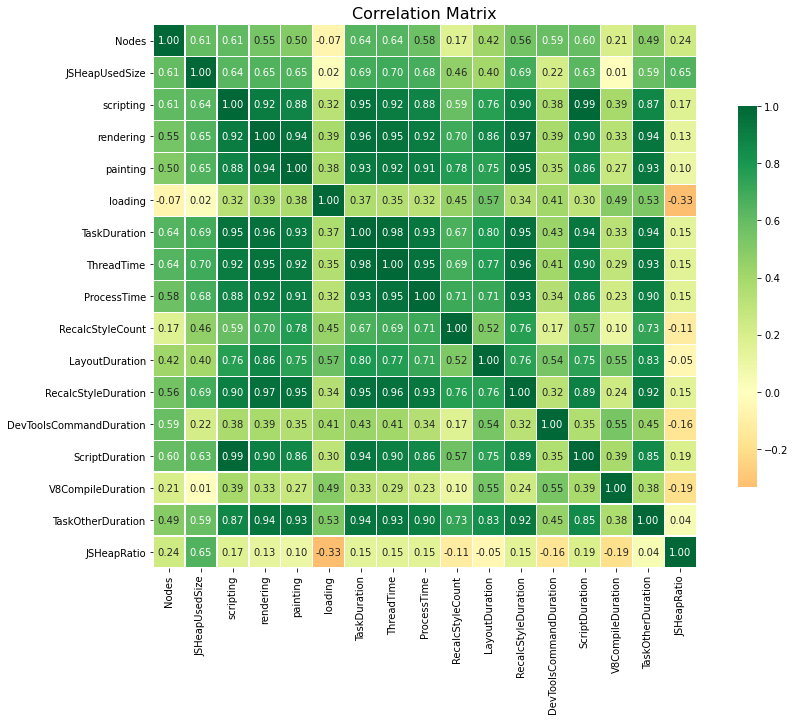

In [15]:
correlation_heatmap(corrdf,'spearman')

In [16]:
# correlation_heatmap(corrdf,'kendall')

In [17]:
# # cmap = ListedColormap(['r','g'])
# f = plt.figure(figsize=(13, 10))
# plt.matshow(corrdf.corr(), fignum=f.number, cmap='RdYlGn') #cmap=cmap
# plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
# plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

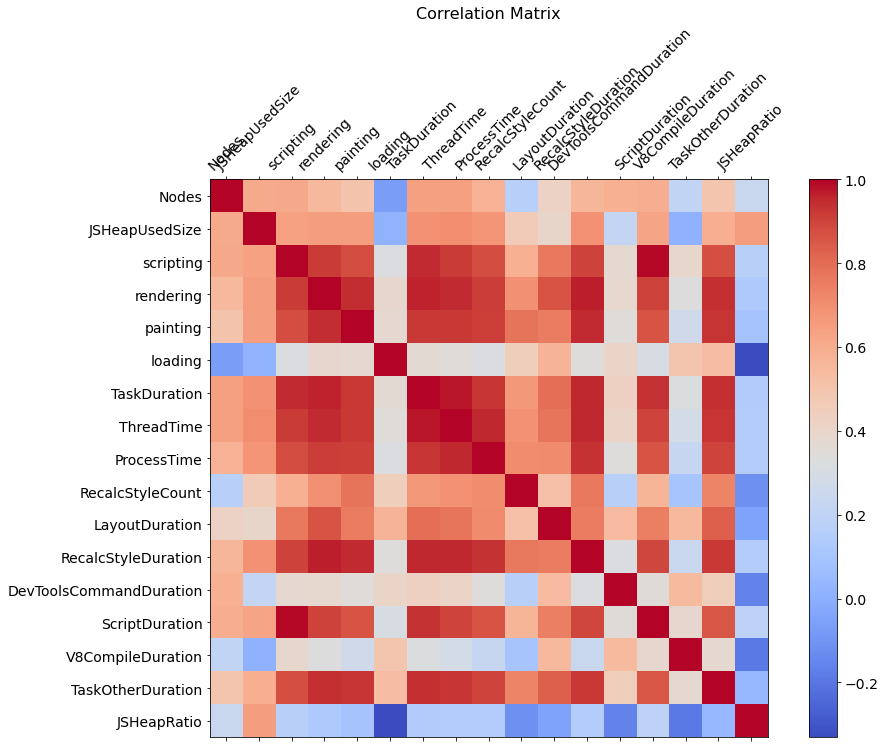

In [18]:
f = plt.figure(figsize=(15, 10))
plt.matshow(corrdf.corr('spearman'), fignum=f.number, cmap='coolwarm') #cmap=cmap
plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Data Prep for Vanilla Regression

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
model_data = corrdf.drop(columns=['loading','DevToolsCommandDuration','V8CompileDuration'])#['loading','Documents','Resources','DevToolsCommandDuration','V8CompileDuration','RecalcStyleCount','LayoutDuration','JSHeapRatio']
model_data

,Nodes,JSHeapUsedSize,scripting,rendering,painting,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,ScriptDuration,TaskOtherDuration,JSHeapRatio
0,330.0,5412548.0,113.008000,93.058,5.983000,1.341042,0.375995,0.890625,6.0,0.080913,0.006582,0.102257,1.139688,0.736579
0,330.0,5450604.0,163.756999,83.199,10.721000,0.409688,0.454113,3.812500,14.0,0.062208,0.012585,0.145061,0.170864,0.741758
0,330.0,5477748.0,119.120000,61.772,7.526999,0.302941,0.340813,0.687500,23.0,0.041370,0.012484,0.109060,0.125836,0.745452
0,330.0,5442708.0,106.325000,50.659,7.085000,0.269681,0.343763,1.062500,19.0,0.036265,0.008655,0.097604,0.115025,0.740683
0,330.0,5443360.0,127.197000,58.582,8.262000,0.305357,0.351943,1.078125,15.0,0.039066,0.009674,0.113848,0.126768,0.740772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,338.0,5560548.0,97.850000,47.023,5.325000,0.256901,0.296244,0.781250,15.0,0.033536,0.007777,0.088454,0.109034,0.756720
0,338.0,5876352.0,110.877999,56.676,9.951999,0.288660,0.338296,0.921875,40.0,0.032822,0.013600,0.097353,0.128425,0.799697
0,338.0,5571636.0,105.055001,57.921,9.035000,0.283464,0.323344,0.859375,32.0,0.037535,0.012329,0.095612,0.120235,0.758229
0,338.0,5573408.0,109.488000,52.567,7.227000,0.283823,0.319941,0.859375,23.0,0.034223,0.009331,0.100385,0.118562,0.758470


## Flexible Regression model

In [21]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def flex_reg_model(activation='relu', learning_rate=0.01):
    model = keras.Sequential([
        layers.Dense(64, activation=activation, input_shape=[len(train_dataset.keys())]),
        layers.Dense(32,activation=activation ),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [22]:
# Train-Test-Split = 0.25
split_ratio = int(model_data.shape[0] * 0.25)

train_dataset = model_data.iloc[:split_ratio]
test_dataset = model_data.iloc[split_ratio:]

In [23]:
len(train_dataset),len(test_dataset)

(394, 1185)

In [24]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Nodes,394.0,1.540198e+03,1.646231e+03,3.300000e+02,3.390000e+02,3.440000e+02,3.299000e+03,1.047000e+04
JSHeapUsedSize,394.0,2.795178e+07,2.981131e+07,5.178828e+06,5.413725e+06,5.658302e+06,5.359216e+07,1.236279e+08
scripting,394.0,4.025549e+02,3.799708e+02,9.161500e+01,1.046738e+02,1.249575e+02,8.087887e+02,1.492193e+03
rendering,394.0,7.828049e+01,3.925170e+01,3.721400e+01,4.715375e+01,5.822150e+01,1.158938e+02,2.461760e+02
painting,394.0,1.075751e+01,5.752239e+00,1.013000e+00,5.617250e+00,9.669500e+00,1.524600e+01,4.301900e+01
TaskDuration,394.0,6.241645e-01,4.558786e-01,2.110390e-01,2.647427e-01,3.075565e-01,1.133342e+00,1.918330e+00
ThreadTime,394.0,6.165173e-01,3.950279e-01,2.423930e-01,3.014260e-01,3.549325e-01,1.058836e+00,1.731875e+00
ProcessTime,394.0,1.953878e+00,1.320996e+00,5.156250e-01,7.812500e-01,1.125000e+00,3.328125e+00,6.937500e+00
RecalcStyleCount,394.0,2.538071e+01,1.460688e+01,6.000000e+00,1.500000e+01,2.450000e+01,2.900000e+01,1.210000e+02
LayoutDuration,394.0,3.649663e-02,6.617921e-03,2.916400e-02,3.213525e-02,3.496600e-02,3.874750e-02,8.091300e-02


In [25]:
train_labels = train_dataset.pop('Nodes')
test_labels = test_dataset.pop('Nodes')

In [26]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [27]:
normed_train_data = norm(train_dataset)
normed_train_data = normed_train_data.drop(columns='Nodes')
normed_test_data = norm(test_dataset)
normed_test_data = normed_test_data.drop(columns='Nodes')

In [28]:
len(normed_train_data),len(normed_test_data)

(394, 1185)

In [29]:
normed_train_data.head()

,JSHeapRatio,JSHeapUsedSize,LayoutDuration,ProcessTime,RecalcStyleCount,RecalcStyleDuration,ScriptDuration,TaskDuration,TaskOtherDuration,ThreadTime,painting,rendering,scripting
0,-0.108493,-0.756063,6.711529,-0.804888,-1.326820,-0.847703,-0.768936,1.572518,12.782798,-0.608874,-0.830026,0.376481,-0.762024
0,-0.041882,-0.754787,3.885112,1.406985,-0.779133,-0.656838,-0.649774,-0.470468,0.279444,-0.411121,-0.006347,0.125307,-0.628464
0,0.005630,-0.753876,0.736390,-0.958654,-0.162986,-0.660049,-0.749997,-0.704625,-0.301674,-0.697936,-0.561609,-0.420580,-0.745939
0,-0.055703,-0.755052,-0.035001,-0.674778,-0.436829,-0.781792,-0.781889,-0.777583,-0.441198,-0.690468,-0.638448,-0.703702,-0.779612
0,-0.054561,-0.755030,0.388244,-0.662949,-0.710673,-0.749393,-0.736667,-0.699325,-0.289646,-0.669761,-0.433832,-0.501851,-0.724682


## Accuracy with old data

In [10]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

model = flex_reg_model(activation='relu',learning_rate=0.01)
history = model.fit(
  normed_train_data, train_labels,
  epochs=1000, validation_split = 0.2,batch_size=64,
  callbacks=[early_stop],
  verbose=0
)

loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=0)

test_predictions = model.predict(normed_test_data).flatten()

r2 = r2_score(test_labels, test_predictions)
print(f'R^2 coefficient of determination: {r2} (1 is best, can be negative if output is reverse of input)')

accuracy = explained_variance_score(test_labels,test_predictions)
print(f' Explained Variance : {accuracy} (1 is best, lower scores are worse )')

rmse = mean_squared_error(test_labels, test_predictions,squared=False)
print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(test_labels,test_predictions)
print(f'Mean Absolute Error: {mae}')

NameError: name 'keras' is not defined

# Together with new Files

In [ ]:
new_trace_files = glob.glob('./tracelyzer/**/*.json')
len(new_trace_files), [int(trace_file.split('\\')[2].split('-')[0]) for trace_file in new_trace_files]

In [ ]:
shape_data = [int(trace_file.split('\\')[1].split('-')[0]) for trace_file in trace_files] +  [int(trace_file.split('\\')[2].split('-')[0]) for trace_file in new_trace_files]
shape_data
from collections import Counter
sCounter = Counter(shape_data)
shapesdf = pd.DataFrame().from_dict({'value':dict(sCounter)})
shapesdf.shape, shapesdf

In [ ]:
mydf = pd.DataFrame()
#load json object
for trace_file in trace_files + new_trace_files:
    with open(trace_file) as f:
        try:
            d = json.load(f)
        except:
            print(f'file: {file} cannot be read')
        
        #lets put the data into a pandas df
        #clicking on raw_nyc_phil.json under "Input Files"
        #tells us parent node is 'programs'
        nycphil = json_normalize(d['profiling']['categories'])
#         print(nycphil.head(3))
        
        nycphil1 = json_normalize(d['profiling']['events'])
#         print(nycphil1.head(3))
        
        nycphil2 = json_normalize(d['rendering'])
#         print(nycphil2.head(3))
        
        nycphil3 = json_normalize(data=d['metrics'], meta=['name','value'])#json_normalize(d['metrics'])
        nycphil3 = nycphil3.set_index('name')
        # nycphil3 = nycphil3.rename(columns={"value": "0"})
        nycphil3 = nycphil3.T
#         print(nycphil3.head(3))
        
        nycphil4 = d['performanceTiming']
        nycphil4 = pd.DataFrame({'value':json.loads(nycphil4)})
        nycphil4 = nycphil4.T
#         nycphil4.head(3)
#         perfkeys = [key for key in d.keys() if key not in ['profiling','rendering','metrics']]
#         nycphil4 = {
#                 key:d[key] for key in perfkeys
#                    }
#         nycphil4 = pd.DataFrame(nycphil4,index={'value'})
#         nycphil4.head()

#         print(nycphil.shape, nycphil1.shape, nycphil2.shape, nycphil3.shape)
        
        for col in nycphil1:
            nycphil[col] = nycphil1[col]
            
        for col in nycphil2:
            nycphil[col] = nycphil2[col]
        
        for col in nycphil3:
        #     print(nycphil3[col])
            nycphil[col] = nycphil3.iloc[0][col]
        
        for col in nycphil4:
        #     print(nycphil4[col])
            nycphil[col] = nycphil4.iloc[0][col]
        
        
#         print(nycphil.shape)
    mydf = nycphil if not mydf.count().any() else mydf.append(nycphil)

In [ ]:
mydf

In [ ]:
# is_NaN = mydf.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# nans = mydf.loc[row_has_NaN == True]
# nans.to_csv('nans.csv')
mydf = mydf.fillna('0')

In [ ]:
mydf.to_csv('metric-newdataframe-'+ datetime.datetime.now().strftime("%d%b%Y-%I%M%p") + '.csv')

In [ ]:
import datetime
datetime.datetime.now().strftime("%d%b%Y-%I%M%p")

## Correlation of Columns with new data

In [ ]:
done = u'\u2713'
todo = u'\u2610'
done_list = [
    'Nodes','JSHeapUsedSize','JSHeapTotalSize'
     ,'scripting','rendering','painting','loading',
     'TaskDuration','ThreadTime','ProcessTime'
    ,'RecalcStyleCount'
    ,'LayoutDuration'
    ,'RecalcStyleDuration'
    ,'DevToolsCommandDuration'
    ,'ScriptDuration'
    ,'V8CompileDuration'
    ,'TaskOtherDuration'
            ]
for func in done_list:
    funcname = func.split("(")[0]
    print(done + funcname)
for func in [col for col in list(mydf.columns) if col not in done_list]:
    funcname = func.split("(")[0]
    print(todo + funcname)

In [ ]:
corrdf = mydf[done_list] #'Major GC','Minor GC'
corrdf

In [ ]:
corrdf['JSHeapRatio'] = corrdf['JSHeapUsedSize']/corrdf['JSHeapTotalSize']
corrdf = corrdf.drop(columns='JSHeapTotalSize')
corrdf

In [ ]:
# corrdf.corr()
corrdf.corr('spearman')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def correlation_heatmap(train, method='pearson'):
    correlations = train.corr(method)

    fig, ax = plt.subplots(figsize=(15,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70},cmap='RdYlGn')
    plt.title('Correlation Matrix', fontsize=16);
    plt.show();
    
# correlation_heatmap(corrdf) 

In [ ]:
correlation_heatmap(corrdf,'spearman')

In [ ]:
f = plt.figure(figsize=(15, 10))
plt.matshow(corrdf.corr('spearman'), fignum=f.number, cmap='coolwarm') #cmap=cmap
plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Data Prep for Vanilla Regression

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model_data = corrdf.drop(columns=['loading','DevToolsCommandDuration','V8CompileDuration'])#['loading','Documents','Resources','DevToolsCommandDuration','V8CompileDuration','RecalcStyleCount','LayoutDuration','JSHeapRatio',]
model_data

## Flexible Regression model

In [ ]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def flex_reg_model(activation='relu', learning_rate=0.01):
    model = keras.Sequential([
        layers.Dense(64, activation=activation, input_shape=[len(train_dataset.keys())]),
        layers.Dense(32,activation=activation ),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [ ]:
# Train-Test-Split = 0.25
split_ratio = int(model_data.shape[0] * 0.25)

train_dataset = model_data.iloc[:split_ratio]
test_dataset = model_data.iloc[split_ratio:]

In [ ]:
len(train_dataset),len(test_dataset)

In [ ]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

In [ ]:
train_labels = train_dataset.pop('Nodes')
test_labels = test_dataset.pop('Nodes')

In [ ]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [ ]:
normed_train_data = norm(train_dataset)
normed_train_data = normed_train_data.drop(columns='Nodes')
normed_test_data = norm(test_dataset)
normed_test_data = normed_test_data.drop(columns='Nodes')

In [ ]:
len(normed_train_data),len(normed_test_data)

In [ ]:
normed_train_data.head()

## Accuracy with new data

In [ ]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

model = flex_reg_model(activation='relu',learning_rate=0.01)
history = model.fit(
  normed_train_data, train_labels,
  epochs=1000, validation_split = 0.2,batch_size=64,
  callbacks=[early_stop],
  verbose=0
)

loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=0)

test_predictions = model.predict(normed_test_data).flatten()

r2 = r2_score(test_labels, test_predictions)
print(f'R^2 coefficient of determination: {r2} (1 is best, can be negative if output is reverse of input)')

accuracy = explained_variance_score(test_labels,test_predictions)
print(f' Explained Variance : {accuracy} (1 is best, lower scores are worse )')

rmse = mean_squared_error(test_labels, test_predictions,squared=False)
print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(test_labels,test_predictions)
print(f'Mean Absolute Error: {mae}')

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Nodes]')
plt.ylabel('Predictions [Nodes]')
lims = [0, 15000]
plt.xlim(lims)
plt.ylim(lims)
plt.gcf().set_size_inches((9,9))
_ = plt.plot(lims, lims)

In [ ]:
sample_test = np.array(normed_train_data.iloc[50]).reshape((1,15))
sample_test

In [ ]:
sample2 = np.array(normed_test_data.iloc[209]).reshape((1,15))
sample2

In [ ]:
normed_test_data.shape, sample_test.shape, sample2.shape

In [ ]:
model.predict(sample_test), train_labels.iloc[50]

In [ ]:
model.predict(sample2), test_labels.iloc[209]

In [ ]:
len(normed_test_data)

In [ ]:
from random import randint
l = []
for i in range(30):
    x = randint(0,1024)
    if x not in l:
        l.append(x)

resultdf = {}

for i in l:
    sample_test = np.array(normed_test_data.iloc[i]).reshape((1,test_dataset.shape[1]))
    resultdf[test_labels.iloc[i]] = model.predict(sample_test).flatten()
    
resultdf

In [ ]:
resultdf = pd.DataFrame.from_dict(resultdf,orient='index',columns=['Predicted Nodes'])
resultdf

# Only New Data

In [ ]:
trace_files = glob.glob('./tracelyzer/**/*.json')
trace_files

In [ ]:
shape_data = [int(trace_file.split('\\')[2].split('-')[0]) for trace_file in trace_files]
shape_data
from collections import Counter
sCounter = Counter(shape_data)
shapesdf = pd.DataFrame().from_dict({'value':dict(sCounter)})
shapesdf.shape, shapesdf

In [ ]:
mydf = pd.DataFrame()
#load json object
for trace_file in trace_files:
    with open(trace_file) as f:
        try:
            d = json.load(f)
        except:
            print(f'file: {file} cannot be read')
        
        #lets put the data into a pandas df
        #clicking on raw_nyc_phil.json under "Input Files"
        #tells us parent node is 'programs'
        nycphil = json_normalize(d['profiling']['categories'])
#         print(nycphil.head(3))
        
        nycphil1 = json_normalize(d['profiling']['events'])
#         print(nycphil1.head(3))
        
        nycphil2 = json_normalize(d['rendering'])
#         print(nycphil2.head(3))
        
        nycphil3 = json_normalize(data=d['metrics'], meta=['name','value'])#json_normalize(d['metrics'])
        nycphil3 = nycphil3.set_index('name')
        # nycphil3 = nycphil3.rename(columns={"value": "0"})
        nycphil3 = nycphil3.T
#         print(nycphil3.head(3))
        
        nycphil4 = d['performanceTiming']
        nycphil4 = pd.DataFrame({'value':json.loads(nycphil4)})
        nycphil4 = nycphil4.T
#         nycphil4.head(3)
#         perfkeys = [key for key in d.keys() if key not in ['profiling','rendering','metrics']]
#         nycphil4 = {
#                 key:d[key] for key in perfkeys
#                    }
#         nycphil4 = pd.DataFrame(nycphil4,index={'value'})
#         nycphil4.head()

#         print(nycphil.shape, nycphil1.shape, nycphil2.shape, nycphil3.shape)
        
        for col in nycphil1:
            nycphil[col] = nycphil1[col]
            
        for col in nycphil2:
            nycphil[col] = nycphil2[col]
        
        for col in nycphil3:
        #     print(nycphil3[col])
            nycphil[col] = nycphil3.iloc[0][col]
        
        for col in nycphil4:
        #     print(nycphil4[col])
            nycphil[col] = nycphil4.iloc[0][col]
        
        
#         print(nycphil.shape)
    mydf = nycphil if not mydf.count().any() else mydf.append(nycphil)

In [ ]:
mydf

In [ ]:
# is_NaN = mydf.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# nans = mydf.loc[row_has_NaN == True]
# nans.to_csv('nans.csv')
mydf = mydf.fillna('0')

In [ ]:
mydf.to_csv('metric-onlynewdataframe-'+ datetime.datetime.now().strftime("%d%b%Y-%I%M%p") + '.csv')

In [ ]:
import datetime
datetime.datetime.now().strftime("%d%b%Y-%I%M%p")

## Correlation of Columns

In [ ]:
done = u'\u2713'
todo = u'\u2610'
done_list = [
    'Nodes','JSHeapUsedSize','JSHeapTotalSize'
     ,'scripting','rendering','painting','loading',
     'TaskDuration','ThreadTime','ProcessTime'
    ,'RecalcStyleCount'
    ,'LayoutDuration'
    ,'RecalcStyleDuration'
    ,'DevToolsCommandDuration'
    ,'ScriptDuration'
    ,'V8CompileDuration'
    ,'TaskOtherDuration'
            ]
for func in done_list:
    funcname = func.split("(")[0]
    print(done + funcname)
for func in [col for col in list(mydf.columns) if col not in done_list]:
    funcname = func.split("(")[0]
    print(todo + funcname)

In [ ]:
corrdf = mydf[done_list] #'Major GC','Minor GC'
corrdf

In [ ]:
corrdf['JSHeapRatio'] = corrdf['JSHeapUsedSize']/corrdf['JSHeapTotalSize']
corrdf = corrdf.drop(columns='JSHeapTotalSize')
corrdf

In [ ]:
# corrdf.corr()
corrdf.corr('spearman')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def correlation_heatmap(train, method='pearson'):
    correlations = train.corr(method)

    fig, ax = plt.subplots(figsize=(15,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70},cmap='RdYlGn')
    plt.title('Correlation Matrix', fontsize=16);
    plt.show();
    
# correlation_heatmap(corrdf) 

In [ ]:
correlation_heatmap(corrdf,'spearman')

In [ ]:
# correlation_heatmap(corrdf,'kendall')

In [ ]:
# # cmap = ListedColormap(['r','g'])
# f = plt.figure(figsize=(13, 10))
# plt.matshow(corrdf.corr(), fignum=f.number, cmap='RdYlGn') #cmap=cmap
# plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
# plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

In [ ]:
f = plt.figure(figsize=(15, 10))
plt.matshow(corrdf.corr('spearman'), fignum=f.number, cmap='coolwarm') #cmap=cmap
plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Data Prep for Vanilla Regression

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model_data = corrdf.drop(columns=['V8CompileDuration'])#['loading','Documents','Resources','DevToolsCommandDuration','V8CompileDuration','RecalcStyleCount','LayoutDuration','JSHeapRatio']
model_data

## Flexible Regression model

In [ ]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def flex_reg_model(activation='relu', learning_rate=0.01):
    model = keras.Sequential([
        layers.Dense(64, activation=activation, input_shape=[len(train_dataset.keys())]),
        layers.Dense(32,activation=activation ),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [ ]:
# Train-Test-Split = 0.25
split_ratio = int(model_data.shape[0] * 0.25)

train_dataset = model_data.iloc[:split_ratio]
test_dataset = model_data.iloc[split_ratio:]

In [ ]:
len(train_dataset),len(test_dataset)

In [ ]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

In [ ]:
train_labels = train_dataset.pop('Nodes')
test_labels = test_dataset.pop('Nodes')

In [ ]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [ ]:
normed_train_data = norm(train_dataset)
normed_train_data = normed_train_data.drop(columns='Nodes')
normed_test_data = norm(test_dataset)
normed_test_data = normed_test_data.drop(columns='Nodes')

In [ ]:
len(normed_train_data),len(normed_test_data)

In [ ]:
normed_train_data.head()

## Accuracy with only new data

In [ ]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

model = flex_reg_model(activation='relu',learning_rate=0.01)
history = model.fit(
  normed_train_data, train_labels,
  epochs=1000, validation_split = 0.2,batch_size=64,
  callbacks=[early_stop],
  verbose=0
)

loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=0)

test_predictions = model.predict(normed_test_data).flatten()

r2 = r2_score(test_labels, test_predictions)
print(f'R^2 coefficient of determination: {r2} (1 is best, can be negative if output is reverse of input)')

accuracy = explained_variance_score(test_labels,test_predictions)
print(f' Explained Variance : {accuracy} (1 is best, lower scores are worse )')

rmse = mean_squared_error(test_labels, test_predictions,squared=False)
print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(test_labels,test_predictions)
print(f'Mean Absolute Error: {mae}')

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Nodes]')
plt.ylabel('Predictions [Nodes]')
lims = [0, 98000]
plt.xlim(lims)
plt.ylim(lims)
plt.gcf().set_size_inches((9,9))
_ = plt.plot(lims, lims)

# Scikitlearn Regression Metrics 

In [ ]:
from sklearn.metrics import explained_variance_score, mean_absolute_error

accuracy = explained_variance_score(test_labels,test_predictions)
print(f'Explained Variance : {accuracy} (1 is best, lower scores are worse )')

mae = mean_absolute_error(test_labels,test_predictions)
print(f'Mean Absolute Error: {mae}')

In [ ]:
from sklearn.metrics import max_error

my_err = max_error(test_labels,test_predictions)
print(f'Max error across dataset : {my_err} (maximum resudial error, should be low)')


In [ ]:
from sklearn.metrics import mean_squared_error

# mse = mean_squared_error(test_labels, test_predictions)
# print(f'Mean Squared Error: {mse}')

rmse = mean_squared_error(test_labels, test_predictions,squared=False)
print(f'Root Mean Squared Error: {rmse}')

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(test_labels, test_predictions)
print(f'R^2 coefficient of determination: {r2} (1 is best, can be negative if output is reverse of input)')

# End bookmark